In [1]:
from SPV_utils import *

In [ ]:
v0s = ["0.10", "0.15", "0.20", "0.25", "0.30", "0.35", "0.40", "0.45"]

v0 = v0s[0]
# disps = get_all_data_npy(rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_", False)
disps = get_all_data_npy(rf"Different_v0_Ens=100/Pin=0/Data/coordinate_p0=3.80_v0={v0}_pin=0_set_", False)

Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_1.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_2.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_3.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_4.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_5.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_6.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_7.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_8.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_9.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_10.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_11.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_12.npy
Different_v0_Ens=100/Pin=0/Data\coordinate_p0=3.80_v0=0.10_pin=0_set_13.npy
Different_v0_Ens=100/

192 322.70000000000005


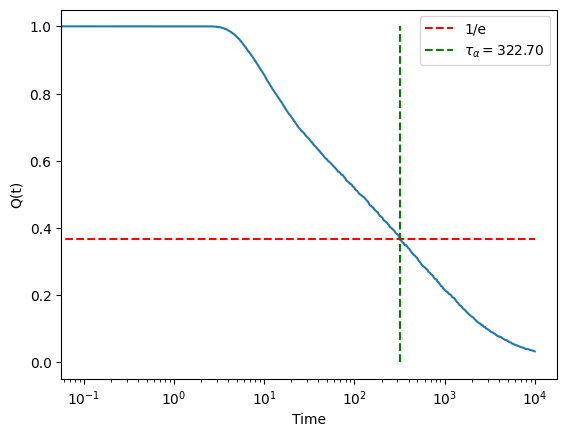

In [3]:
Q_t_avg = np.zeros(len(disps[1][0]), dtype=np.complex128)
for i in disps.keys():
    timestamps, arrs, N = disps[i]
    Q_t_avg +=Q_t(arrs, arrs[0])
Q_t_avg /= len(disps.keys())
T_alpha_ind = np.where(np.abs(Q_t_avg) < 1/np.e)[0][0]
T_alpha = timestamps[T_alpha_ind]

print(T_alpha_ind, T_alpha)

plt.plot(timestamps, np.abs(Q_t_avg))
plt.xscale('log')
plt.xlabel("Time")
plt.ylabel("Q(t)")
plt.hlines(1/np.e, colors='r', linestyles='dashed', label = '1/e', xmin = timestamps[0], xmax = timestamps[-1])
plt.vlines(T_alpha, ymin=0, ymax=1, colors='g', linestyles='dashed', label = r"$\tau_{\alpha} = $" + f"{T_alpha:.2f}")
plt.legend()

plt.show()


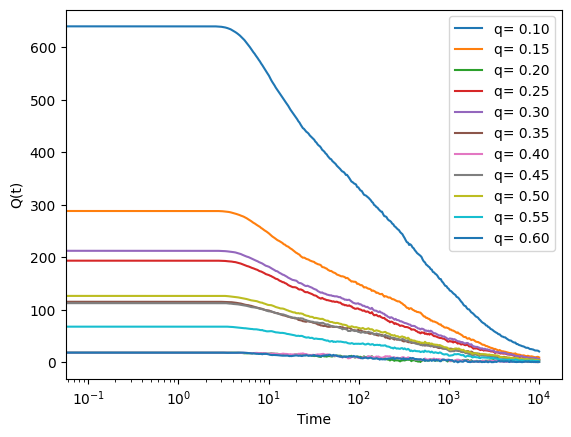

In [ ]:
for q in np.arange(0.1, 0.65, 0.05):
# for q in [0.1, 0.2, 0.6]:
    Q_f = np.zeros(len(disps[1][0]), dtype=np.complex128)
    for i in disps.keys():
        timestamps, arrs, N = disps[i]
        Q_f += Q_f_avg(q, arrs, arrs[0]).mean(axis=1)
    Q_f /= len(disps.keys())
    plt.plot(timestamps, np.abs(Q_f), label = f"q= {q:.2f}")
plt.xscale('log')
plt.xlabel("Time")
plt.ylabel("Q(t)")
plt.legend()
plt.show()

In [5]:
S4s = {}    
for q in np.arange(0.01, 0.5, 0.01):
    print(q)
    S4s[q] = S4(q, disps)

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49


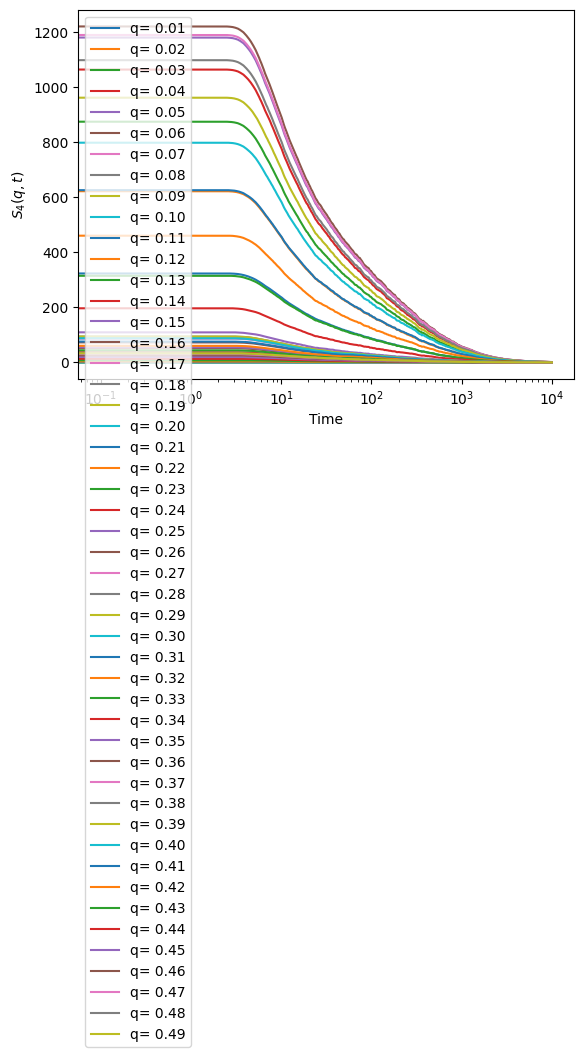

In [14]:
for q in S4s.keys():
    plt.plot(timestamps, np.abs(S4s[q]), label = f"q= {q:.2f}")
plt.legend()
plt.xlabel("Time")
plt.ylabel(r"$S_4(q,t)$")
plt.xscale('log')
plt.show()

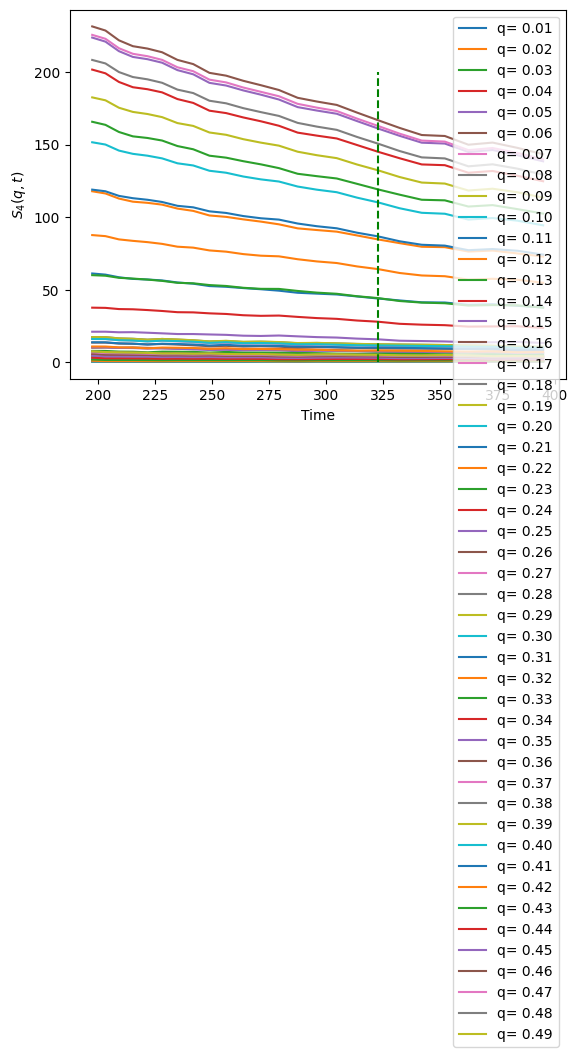

In [15]:
for q in S4s.keys():
    plt.plot(timestamps[175:200], np.abs(S4s[q])[175:200], label = f"q= {q:.2f}")
plt.legend()
plt.xlabel("Time")
plt.ylabel(r"$S_4(q,t)$")
# plt.xscale('log')
plt.vlines(T_alpha, ymin=0, ymax=200, colors='g', linestyles='dashed', label = r"$\tau_{\alpha} = $" + f"{T_alpha:.2f}")
plt.show()

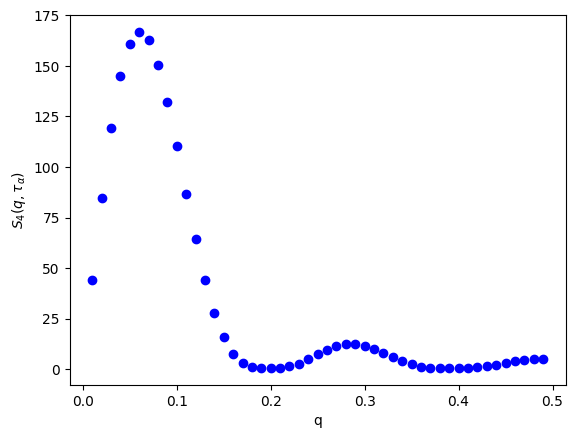

In [16]:
for q in S4s.keys():
    plt.plot(q, np.abs(S4s[q][T_alpha_ind]), 'o', c = 'b')
plt.xlabel("q")
plt.ylabel(r"$S_4(q,\tau_{\alpha})$")
plt.show()

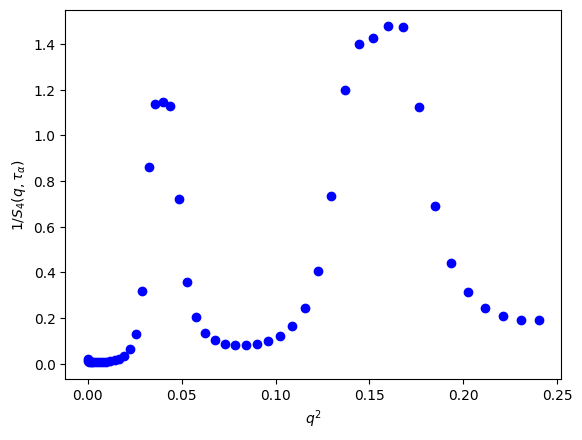

In [17]:
for q in S4s.keys():
    plt.plot(q**2, 1/np.abs(S4s[q][T_alpha_ind]), 'o', c = 'b')
plt.xlabel(r"$q^2$")
plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
plt.show()